In [5]:
# 연습문제 3.1.6
a = np.array([[4], [5], [2], [2]])
b = np.array([[4], [0], [2], [0]])
c = np.array([[2], [2], [0], [1]])
# (1) 유클리드 거리 :b - c가 가장 가깝다. a - b 가 가장 멀다
print ("a - b = ", np.linalg.norm(a - b))
print ("b - c = ", np.linalg.norm(b - c))
print ("a - c = ", np.linalg.norm(a - c))

a - b =  5.385164807134504
b - c =  3.605551275463989
a - c =  4.242640687119285


In [19]:
# (2) 코사인 유사도 a - c가 가장 유사하다,  b - c가 가장 멀다
print("a - b", 1 - (a.T @ b)[0][0] / (np.linalg.norm(a) * np.linalg.norm(b)))
print("b - c", 1 - (b.T @ c)[0][0] / (np.linalg.norm(b) * np.linalg.norm(c)))
print("a - c", 1 - (a.T @ c)[0][0] / (np.linalg.norm(a) * np.linalg.norm(c)))

a - b 0.36112343500006017
b - c 0.40371520600005606
a - c 0.04761904761904767


In [25]:
# 연습문제 3.2.5
# (1)
x1 = np.array([[1],[1]])
m1 = x1 @ x1.T
np.linalg.matrix_rank(m1)

1

In [31]:
# (2)
x2 = np.array([[1],[-1]])
print(np.hstack([x1,x2]))
print(np.vstack([x1.T,x2.T]))
m2 = np.hstack([x1,x2]) @ np.vstack([x1.T,x2.T])
np.linalg.matrix_rank(m2)

[[ 1  1]
 [ 1 -1]]
[[ 1  1]
 [ 1 -1]]


2

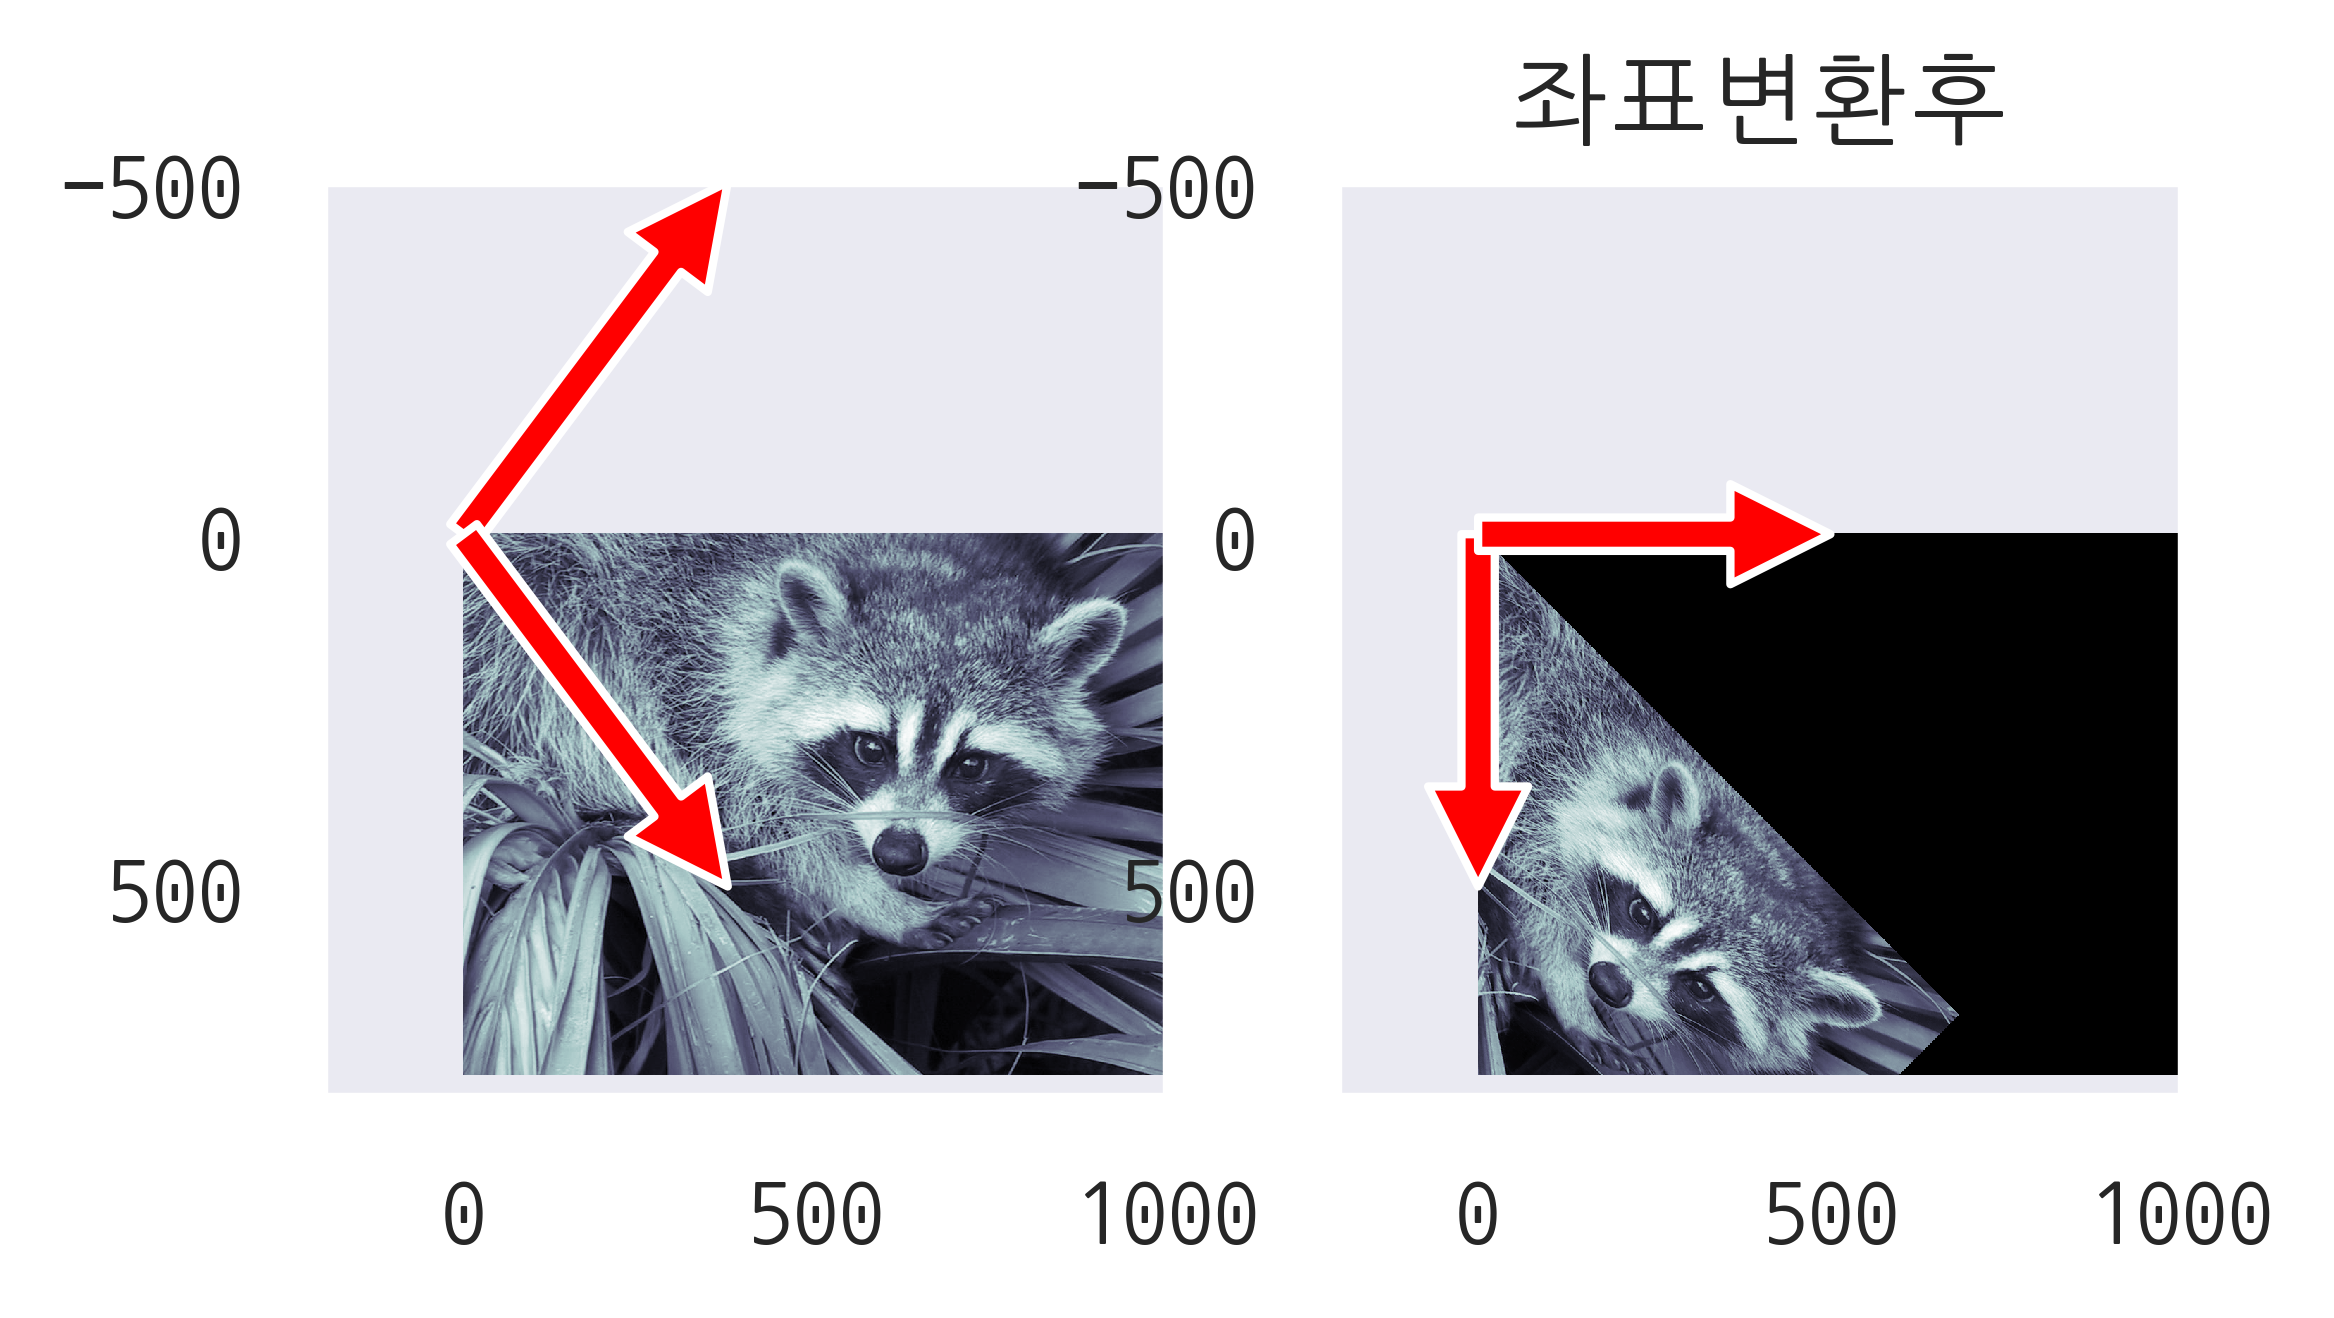

In [9]:
# 3.2 좌표변환 실습
# 연습문제 3.2.9

import scipy as sp
import scipy.misc
import scipy.ndimage
f = sp.misc.face (gray = True)

e1 = np.array([0, -1])
e2 = np.array([1,0])
E = np.vstack([e1,e2]).T
g1 = np.array([1,0.75])
g2 = np.array([-1,0.75])
A = np.vstack([g1,g2]).T

f1= sp.ndimage.affine_transform(f,A)

plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone)
plt.annotate('', xy=500*np.dot(E, g1), xytext=(0,0), arrowprops = dict(facecolor = 'red'))
plt.annotate('', xy=500*np.dot(E, g2), xytext=(0,0), arrowprops = dict(facecolor = 'red'))
plt.grid(False)
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.subplot(122)
plt.imshow(f1, cmap = mpl.cm.bone)
plt.annotate('', xy=(0,500), xytext = (0,0), arrowprops = dict(facecolor='red'))
plt.annotate('', xy=(500,0), xytext = (0,0), arrowprops = dict(facecolor='red'))
plt.grid(False)
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환후")
plt.show()

In [3]:
# 넘파이를 사용한 고유분해
B = np.array([[2, 3], [2, 1]])
w2, V2= np.linalg.eig(B) # 고윳값 구하는 힘수
print(w2) # w2 = 고윳값
print(V2) # V2 = 고유벡터, 고유벡터는 열로 봐야함 아래의 예제는 0.83 0.55가 세트임

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [5]:
# 넘파이를 사용한 고유분해
C = np.array([[0, -1], [1, 0]])
w2, V2 = np.linalg.eig(C)
print(w2) #  복소수까지 계산해줌
print(V2)

[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [11]:
# 연습문제 3.3.5
D = np.array([[2,1],[1,2]])
w2, V2 = np.linalg.eig(D)
print(w2)
print(V2)

E = np.array([[[2,3],[2,1]]])
w2, V2 = np.linalg.eig(E)
print()
print(w2)
print(V2)

F = np.array([[1,1],[0,1]])
w2, V2 = np.linalg.eig(F)
print()
print(w2) #고윳값이 중복이여도 같은 값이 두번 나옴
print(V2)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[[ 4. -1.]]
[[[ 0.83205029 -0.70710678]
  [ 0.5547002   0.70710678]]]

[1. 1.]
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16]]


In [30]:
# 대각화 넘파이
B = np.array([[2, 3], [2, 1]])
w2, V2= np.linalg.eig(B) # 고윳값 구하는 힘수
print(w2) # w2 = 고윳값
print(V2) # V2 = 고유벡터, 고유벡터는 열로 봐야함 아래의 예제는 0.83 0.55가 세트임

[ 4. -1.]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


In [31]:
V2_inv = np.linalg.inv(V2) # V2의 역행렬 np.linalg.inv 로 만듬
V2_inv

array([[ 0.72111026,  0.72111026],
       [-0.56568542,  0.84852814]])

In [32]:
V2 @ np.diag(w2) @ V2_inv #np.diag(w2)는 고윳값의 대각화

array([[2., 3.],
       [2., 1.]])

In [40]:
# 연습문제 3.3.6
G = np.array([[2, 3], [2, 1]])
w3, V3 = np.linalg.eig(G)
V3_inv = np.linalg.inv(V3)
print(G)
V3 @ np.diag(w3) @ V3_inv

[[2 3]
 [2 1]]


array([[2., 3.],
       [2., 1.]])

In [41]:
H = np.array([[1,1],[0,1]])
w4, V4 = np.linalg.eig(H)
V4_inv = np.linalg.inv(V4)
print(H)
V4 @ np.diag(w4) @ V4_inv

[[1 1]
 [0 1]]


array([[1., 0.],
       [0., 1.]])

In [62]:
# 연습문제 3.3.8
# 순서 - I의 고윳값과, 고유벡터를 구한뒤, 
# 고유값은 대각행렬을 구한 뒤 역행렬을 하고, 
# 고유벡터도 역행렬 한 값을 구하여
# 고유벡터 @ 고유값의 대각행렬의 역행렬 @ # 고유벡터의 역행렬 을 구함
I = np.array([[2,3],[2,1]])
w5, V5 = np.linalg.eig(I) # I의 고윳값, 고유벡터 구하는 함수 np.linalg.eig
W5 = np.diag (w5) # w5의 대각행렬 구하는 함수 np.diag
W5_inv = np.linalg.inv(W5) # W5의 역행렬 구하는 함수 np.linalg.inv
V5_inv = np.linalg.inv(V5)
print(np.linalg.inv(I))
V5 @ W5_inv @ V5_inv

[[-0.25  0.75]
 [ 0.5  -0.5 ]]


array([[-0.25,  0.75],
       [ 0.5 , -0.5 ]])

In [70]:
# 연습문제 3.3.9
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # iris 데이터를 행렬X에 저장
XTX = X.T @ X #대칭정방행렬 만들어줌

w6, V6 = np.linalg.eig(XTX) # 대칭정방행렬의 고윳값 확인
w6

array([9.20830507e+03, 3.15454317e+02, 1.19780429e+01, 3.55257020e+00])

In [72]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data # iris 데이터를 행렬X에 저장
XTX = X.T @ X #대칭정방행렬 만들어줌

w6, V6 = np.linalg.eig(XTX) # 대칭정방행렬의 고윳값 확인
w6

array([1.58386796e+08, 1.18747372e+07, 4.17002244e+05, 1.61644573e+05,
       2.52697480e+04, 1.47629635e+04, 8.18396001e+03, 6.07326738e+03,
       4.23577535e+03, 6.06399504e+02, 3.27412564e+02, 3.04157837e+01,
       2.19326965e+00])

In [87]:
# 파이썬을 이용한 특잇값 분해
from numpy.linalg import svd

A = np.array([[3,-1],[1,3],[1,1]])
U , S, VT = svd(A) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다.
print(U)
print()
print(S)
print()
print(VT)
print()
print(U @ np.diag(S,1)[:,1:] @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고, 0만 있는 부분은 삭제

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -1.94289029e-16  9.12870929e-01]]

[3.46410162 3.16227766]

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

[[ 3. -1.]
 [ 1.  3.]
 [ 1.  1.]]


In [102]:
# 연습문제 3.4.1
B = np.array([[3, 2, 2], [2, 3, -2]])
C = np.array([[2, 4], [1, 3],[0, 0], [0, 0]])
U , S, VT = svd(B) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다.
print(U)
print()
print(np.diag(S, -1)[1:,:])
print()
print(VT)
print()
print(U @ np.diag(S,-1)[1:,:] @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고, 0만 있는 부분은 삭제 축소형으로 하면 안해주어도됨

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

[[5. 0. 0.]
 [0. 3. 0.]]

[[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [104]:
B = np.array([[3, 2, 2], [2, 3, -2]])
U , S, VT = svd(B,full_matrices = False ) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다. 축소형은 full_matrices 사용
print(U)
print()
print(np.diag(S))
print()
print(VT)
print()
print(U @ np.diag(S) @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고,축소형으로 하여 diag(S) 만 하면됨

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

[[5. 0.]
 [0. 3.]]

[[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]]

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [105]:
C = np.array([[2, 4], [1, 3],[0, 0], [0, 0]])
U , S, VT = svd(C) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다.
print(U)
print()
print(S)
print()
print(VT)
print()
print(U @ np.diag(S,2)[:,2:] @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고, 0만 있는 부분은 삭제 축소형으로 하면 안해주어도됨

[[-0.81741556 -0.57604844  0.          0.        ]
 [-0.57604844  0.81741556  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

[5.4649857  0.36596619]

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

[[2. 4.]
 [1. 3.]
 [0. 0.]
 [0. 0.]]


In [99]:
C = np.array([[2, 4], [1, 3],[0, 0], [0, 0]])
U , S, VT = svd(C,full_matrices = False ) #오른쪽 특이행렬은 이미 T(전치행렬)로 나오게 된다. 축소형은 full_matrices 사용
print(U)
print()
print(S)
print()
print(VT)
print()
print(U @ np.diag(S) @ VT) # S는 대각행렬로 나오지않음으로 바꿔주고,축소형으로 하여 diag(S) 만 하면됨

[[-0.81741556 -0.57604844]
 [-0.57604844  0.81741556]
 [ 0.          0.        ]
 [ 0.          0.        ]]

[5.4649857  0.36596619]

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

[[2. 4.]
 [1. 3.]
 [0. 0.]
 [0. 0.]]


In [109]:
# 연습문제 3.4.2
U , S, VT = svd(B,full_matrices = False )
print(B @ VT.T)
print()
print((np.diag(S) @ U.T).T)

[[-3.53553391 -2.12132034]
 [-3.53553391  2.12132034]]

[[-3.53553391 -2.12132034]
 [-3.53553391  2.12132034]]


In [110]:
U , S, VT = svd(C,full_matrices = False )
print(C @ VT.T)
print()
print((np.diag(S) @ U.T).T)

[[-4.46716435 -0.21081425]
 [-3.14809647  0.29914646]
 [ 0.          0.        ]
 [ 0.          0.        ]]

[[-4.46716435 -0.21081425]
 [-3.14809647  0.29914646]
 [ 0.          0.        ]
 [ 0.          0.        ]]


In [130]:
# 연습문제 3.4.3
A = np.array([[3, -1],[1,3],[1,1]])
w, V = np.linalg.eig(A @ A.T) # 공분산 행렬
U, S, VT = np.linalg.svd(A)
idx = np.argsort(w ** 2)[::-1]
w = w[idx]
V = V[:,idx]
print(w)
print()
print(S **2)
print()
print(U) # 왼쪽 특이벡터
print()
print(V) # 특이벡터

[12. 10.  0.]

[12. 10.]

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -1.94289029e-16  9.12870929e-01]]

[[-4.08248290e-01 -8.94427191e-01  1.82574186e-01]
 [-8.16496581e-01  4.47213595e-01  3.65148372e-01]
 [-4.08248290e-01  5.07704275e-16 -9.12870929e-01]]
